<a href="https://colab.research.google.com/github/hkaragah/risk_reliability/blob/main/BART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BART (Bayesian Additive Regression Trees)

Bayesian Additive Regression Trees (BART) is a non-parametric machine learning model that uses a sum of regression trees to predict a response variable. BART is designed to provide flexible and accurate predictions, similar to other tree-based models like Random Forests or Gradient Boosting, but with a Bayesian twist, allowing for uncertainty quantification and regularization.

## Key Features of BART:
1- __Additive Regression Trees:__

  * BART models the target as the sum of many individual regression trees. Each tree models a small part of the overall relationship between the predictors and the target.
  * This additive nature helps BART handle complex, non-linear interactions between predictors.

2- __Bayesian Framework:__

  * Unlike other tree-based methods, BART adopts a fully Bayesian approach, incorporating prior distributions and making probabilistic predictions.
  * Priors help regularize the model, preventing overfitting. For instance, BART uses priors to favor small trees, keeping the model interpretable and avoiding overly complex tree structures.

3- __Model Structure:__

  * The model is represented as:
  $$y=f(x)+ϵ, f(x)=\sum_{t=1}^{T}{g_t(x; Tree_t)},$$

  where $y$ is the response, $x$ are the input features, $ϵ$ is normally distributed noise, and $g_t(x)$ represents the prediction from the $t$-th regression tree.

4- __MCMC for Posterior Inference:__
  * BART uses Markov Chain Monte Carlo (MCMC) techniques to sample from the posterior distribution of the model's parameters.
  * MCMC samples trees and their corresponding parameters, allowing the model to capture both the point estimate of predictions and the uncertainty around them.

5- __Regularization and Priors:__

  * Tree Priors: BART applies a prior to ensure that each individual tree is shallow, typically favoring small trees (with few splits), which helps in reducing overfitting.
  * Shrinkage Priors: A shrinkage parameter controls the contribution of each tree to the overall prediction, similar to regularization in linear models. This keeps the individual trees' effects small, leading to a smoother and more interpretable model.

  * Noise Prior: The noise term $ϵ$ is also modeled, typically using a normal distribution prior, allowing the model to capture uncertainty in the data.

6- __Predictions and Uncertainty:__

  * BART provides not only point estimates (predictions) but also full posterior distributions. This means it offers uncertainty intervals for its predictions, which is useful in cases where understanding the confidence in the model's predictions is important.

7- __Adaptive Tree Selection:__

  * The BART algorithm adaptively grows, prunes, and changes trees during training based on the data. The MCMC process iteratively selects trees and fits them to minimize prediction error, ensuring that each tree contributes incrementally to improving the model's performance.


## Strengths of BART:

* __Flexibility:__ BART can model complex, non-linear relationships without needing to specify the functional form of the model beforehand.
* __Uncertainty Quantification:__ The Bayesian nature allows BART to estimate the uncertainty around predictions, offering a probabilistic interpretation.
* __Regularization:__ Built-in regularization through the use of priors and shrinkage ensures that BART models do not overfit and remain interpretable.
* __No Need for Extensive Tuning:__ Unlike other machine learning methods (e.g., Random Forests or Gradient Boosting), BART generally requires less manual hyperparameter tuning, since the priors help control model complexity automatically.


## Use Cases:

BART is commonly used in settings where:

* The relationship between features and the response is complex and possibly non-linear.
* Probabilistic predictions or uncertainty quantification are required.
* The dataset is small to moderately sized, as MCMC-based methods can be computationally intensive for very large datasets.


## Limitations:

* __Computationally Intensive:__ BART can be slower than other tree-based models because it relies on MCMC sampling, making it less suited for very large datasets.
* __Interpretability:__ While BART offers regularization, the additive nature of multiple trees can still make the overall model harder to interpret compared to simpler models (though it tends to be more interpretable than methods like deep learning).

In [ ]:
# !pip install git+https://github.com/JakeColtman/pybarts.git
# !pip install bartpy

In [ ]:
# !pip show bartpy

In [ ]:
!pip install rpy2

In [1]:
# Load the rpy2 magic extension
%load_ext rpy2.ipython

In [ ]:
# Install R Packages (including `dbarts`)
%%R
install.packages('dbarts')

(as ‘lib’ is unspecified)







	‘/tmp/RtmpZB6vhj/downloaded_packages’



# Import Depedencies

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
# Convert data to R-compatible format
import rpy2.robjects as robjects
from rpy2.robjects import numpy2ri

# Generate a Sample Regression Dataset

In [5]:
# Generate synthetic data
X, y = make_regression(n_samples=500, n_features=5, noise=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
X_train.shape

(350, 5)

In [5]:
# Activate automatic conversion of NumPy objects to R
numpy2ri.activate()

# Convert the training data to R objects
robjects.globalenv['X_train'] = X_train
robjects.globalenv['y_train'] = y_train
robjects.globalenv['X_test'] = X_test

# Fit a BART model

In [6]:
# Run BART in R using rpy2 magic
%%R
library(dbarts)

# Fit BART model on the training data
bart_fit <- bart(X_train, y_train, keeptrees = TRUE)



Running BART with numeric y

number of trees: 200
number of chains: 1, number of threads 1
tree thinning rate: 1
Prior:
	k prior fixed to 2.000000
	degrees of freedom in sigma prior: 3.000000
	quantile in sigma prior: 0.900000
	scale in sigma prior: 0.000000
	power and base for tree prior: 2.000000 0.950000
	use quantiles for rule cut points: false
	proposal probabilities: birth/death 0.50, swap 0.10, change 0.40; birth 0.50
data:
	number of training observations: 350
	number of test observations: 0
	number of explanatory variables: 5
	init sigma: 0.189699, curr sigma: 0.189699

Cutoff rules c in x<=c vs x>c
Number of cutoffs: (var: number of possible c):
(1: 100) (2: 100) (3: 100) (4: 100) (5: 100) 

Running mcmc loop:
iteration: 100 (of 1000)
iteration: 200 (of 1000)
iteration: 300 (of 1000)
iteration: 400 (of 1000)
iteration: 500 (of 1000)
iteration: 600 (of 1000)
iteration: 700 (of 1000)
iteration: 800 (of 1000)
iteration: 900 (of 1000)
iteration: 1000 (of 1000)
total seconds in l

# Make Predictions

In [19]:
# Make predictions on the test set
%%R
bart_pred <- predict(bart_fit, newdata = X_test, type = "ppd", n.sims = 1000)

# Assign bart_pred to be returned, but don't print it
invisible(bart_pred)

In [20]:
# Retrieve bart_pred from R into Python
# Convert bart_pred to a NumPy array
bart_pred = np.array(robjects.globalenv['bart_pred']) # shape (1000,150)

# Average the predictions across the first dimension
# bart_pred shape is (1000, 150) so we take the mean along axis 0
bart_pred_mean = bart_pred.mean(axis=0)


# Calculate the Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(y_test, bart_pred_mean)

print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Test Set: 40.47822013151555


# Get Prediction Intervals

In [23]:
# Calculate the mean predictions and the prediction intervals

mean_predictions = bart_pred.mean(axis=0)  # 50th percentile (mean)
lower_bound = np.percentile(bart_pred, 2.5, axis=0)  # 2.5th percentile (lower bound)
upper_bound = np.percentile(bart_pred, 97.5, axis=0)  # 97.5th percentile (upper bound)

# Print the prediction intervals
for i in range(len(mean_predictions)):
    print(f"Prediction: {mean_predictions[i]}, Interval: [{lower_bound[i]}, {upper_bound[i]}]")


Prediction: -24.107468647306465, Interval: [-33.48129846071468, -15.345799270538752]
Prediction: 12.427665155703226, Interval: [3.6380605408272095, 21.667298201412823]
Prediction: -1.77332367620785, Interval: [-29.196766445981755, 39.98556678124896]
Prediction: -130.5313397426195, Interval: [-140.93201643790104, -120.87968547760639]
Prediction: 54.60860577647291, Interval: [43.39150653205977, 69.83489950274463]
Prediction: 8.570436954897811, Interval: [-0.8840546907746848, 17.435220494401452]
Prediction: -10.872651975998306, Interval: [-19.509067254436605, 2.451548963106429]
Prediction: 112.11425107740288, Interval: [103.93591822001578, 120.65650699588113]
Prediction: 13.633332765955485, Interval: [1.40412155415273, 29.657824727597724]
Prediction: -171.6709403611828, Interval: [-184.93207602435956, -160.48288249210086]
Prediction: 165.51455636871586, Interval: [151.05212725660851, 177.64499329987362]
Prediction: -64.48533441887749, Interval: [-77.13301107727698, -48.26438968970571]
Pre

# Visualize the Results

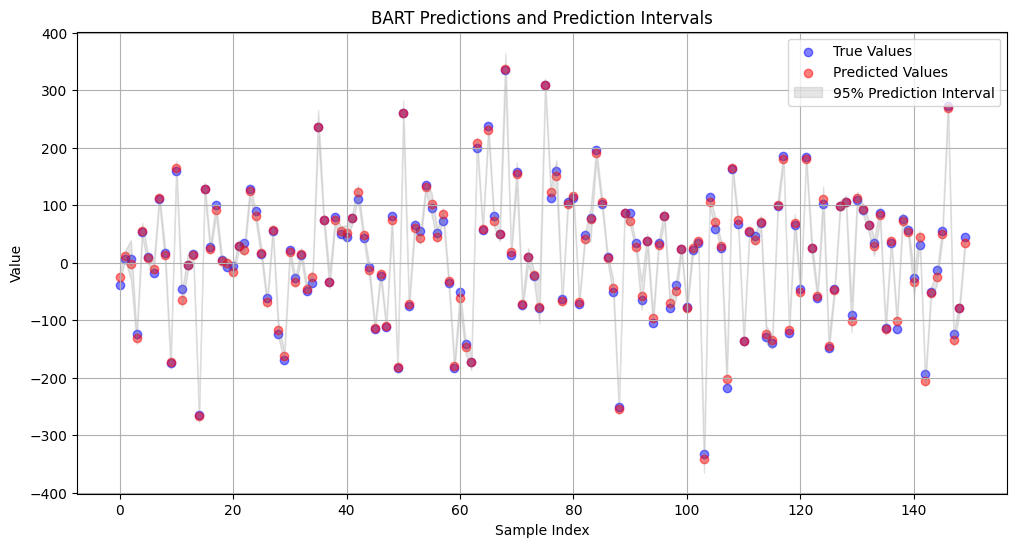

In [24]:
import matplotlib.pyplot as plt

# Step 7: Visualization of predictions with intervals
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, label='True Values', color='blue', alpha=0.5)
plt.scatter(range(len(mean_predictions)), mean_predictions, label='Predicted Values', color='red', alpha=0.5)

# Fill between the lower and upper bounds for the prediction intervals
plt.fill_between(range(len(mean_predictions)), lower_bound, upper_bound, color='gray', alpha=0.2, label='95% Prediction Interval')

plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('BART Predictions and Prediction Intervals')
plt.legend()
plt.grid()
plt.show()